In [2]:
import os
from dashscope import MultiModalConversation
from http import HTTPStatus
from PIL import Image
import dashscope
import random
import requests
import re

os.system('export DASHSCOPE_API_KEY=sk-fc58a205ddfb4a718bf904619f3aba59')

0

In [3]:
def extract_box(text, w, h):
    pattern = r'\((.*?)\)'
    matches = re.findall(pattern, text)
    box = []
    for match in matches:
        box += match.split(',')
    for i in range(len(box)):
        box[i] = eval(box[i])
    box[0] = int(box[0] / 1000 * w)
    box[1] = int(box[1] / 1000 * h)
    box[2] = int(box[2] / 1000 * w)
    box[3] = int(box[3] / 1000 * h)
    return box
def reasoning_grouding_by_qwen(file_path, text_prompt):
    """Sample of use local file.
       linux&mac file schema: file:///home/images/test.png
       windows file schema: file://D:/images/abc.png
    """

    messages = [{
        'role': 'system',
        'content': [{
            'text': '''
                    You are an AI assistant who is good at making accurate vision grounding based on questions asked
                    '''
        }]
    }, {
        'role':
        'user',
        'content': [
            {
                'image': f'file://{file_path}'
            },
            {
                'text': text_prompt
            },
        ]
    }]
    response = MultiModalConversation.call(model='qwen-vl-chat-v1', messages=messages)
    image = Image.open(file_path)
    
    # print(response.output.choices)
    # answer = response.output.choices[0].message.content[0]['box']
    answer = response.output.choices[0].message.content
    # result_image = response.output.choices[0].message.content[1]['result_image']
    # result_image = Image.open(requests.get(result_image, stream=True).raw)
    box = extract_box(answer, *(image.size))
    return answer, box

In [6]:
# file_path = 'data/nerf_llff_data/room/images_4/DJI_20200226_143850_006.JPG'
file_path = 'tmp.jpg'
# text_prompt = 'Please grounding <ref> blue elephant </ref>'
text_prompt = 'Please grounding <ref> what can be used to play videos </ref>'
answer, box = reasoning_grouding_by_qwen(file_path, text_prompt)

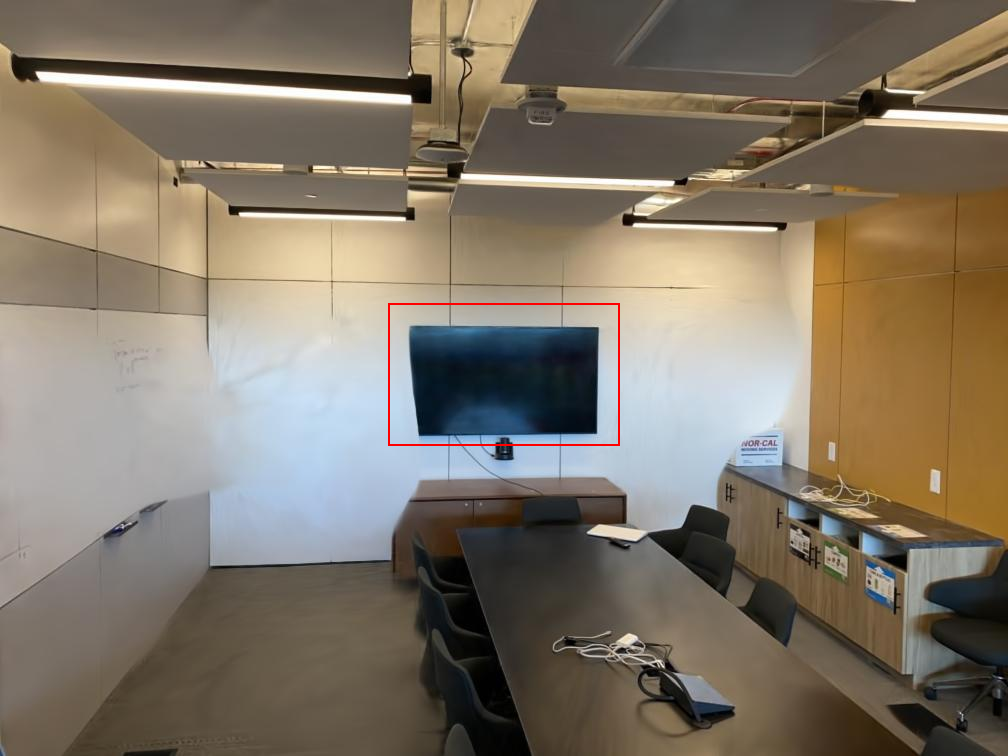

In [7]:
from PIL import Image
from PIL import ImageDraw
from copy import deepcopy
def draw_rectangle(image, rectangle_coordinates, outline_color="red", thickness=2):
    # 打开图像
    image = deepcopy(image)
    # 创建绘图对象
    draw = ImageDraw.Draw(image)
    for rectangle_coordinate in rectangle_coordinates:
        draw.rectangle(rectangle_coordinate, outline=outline_color, width=thickness)
    # 绘制矩形
    # 保存结果
    # image.save(output_path)
    return image
# image = Image.open('/Users/zhijiewang/Desktop/figurines/images/frame_00001.jpg')
image = Image.open(file_path)
draw_rectangle(image, [box])

In [1]:
from PIL import Image
import numpy as np
import os

In [55]:
mask_annotations_root = 'data/nerf_llff_data/trex/masks_4/Annotations'
annotation_names = os.listdir(mask_annotations_root)
annotation_paths = [os.path.join(mask_annotations_root, name) for name in annotation_names]
annotations = [np.array(Image.open(path)) for path in annotation_paths]

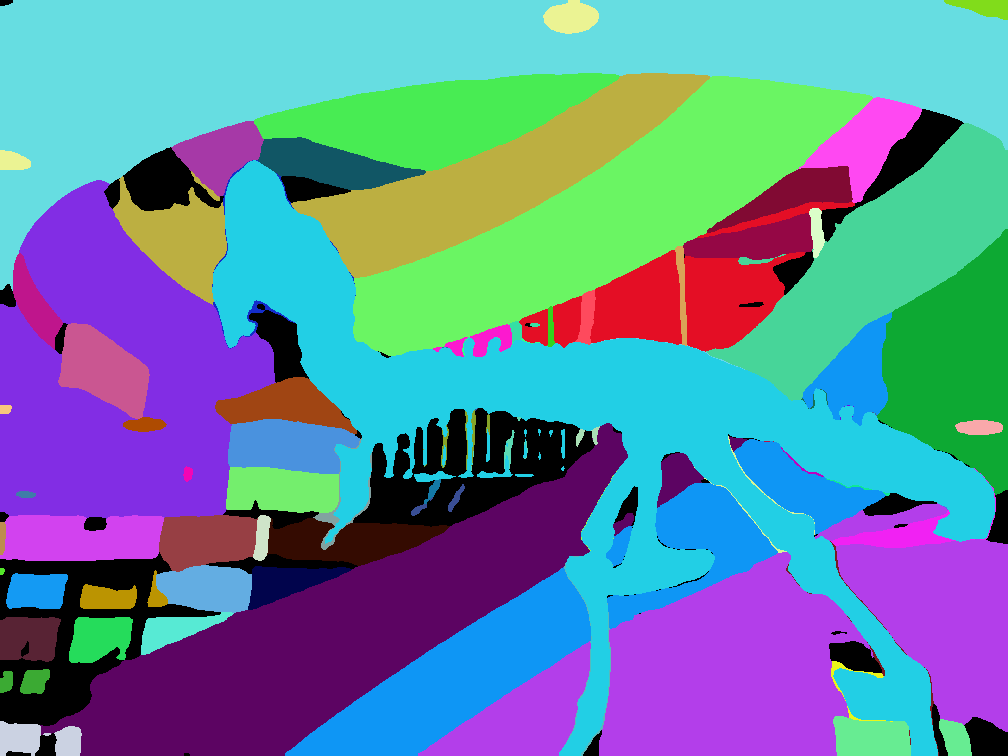

In [56]:
Image.fromarray(annotations[0])

In [57]:
target_color = annotations[0][380, 500, :].reshape(1, 3)

In [58]:
mask_save_path = 'data/nerf_llff_data/trex/masks_4/what looks like the skeleton of a large animal'
os.makedirs(mask_save_path, exist_ok=True)

In [59]:
for i in range(len(annotations)):
    mask_name = annotation_names[i]
    mask_path = os.path.join(mask_save_path, mask_name)
    annotation = annotations[i]
    mask_shape = annotation.shape[:2]
    mask = (annotation.reshape(-1, 3) == target_color).all(-1)
    mask = (mask * 255).astype(np.uint8).reshape(*mask_shape)
    Image.fromarray(mask, mode='L').save(mask_path)

In [11]:
target_color = np.array([102, 221, 225]).reshape(1, 3)
img_shape = img_np.shape[:2]
mask = (img_np.reshape(-1, 3) == target_color).all(-1)

NameError: name 'img_np' is not defined

In [36]:
mask

array([False, False, False, ..., False, False, False])

In [37]:
mask = mask.reshape(*img_shape)

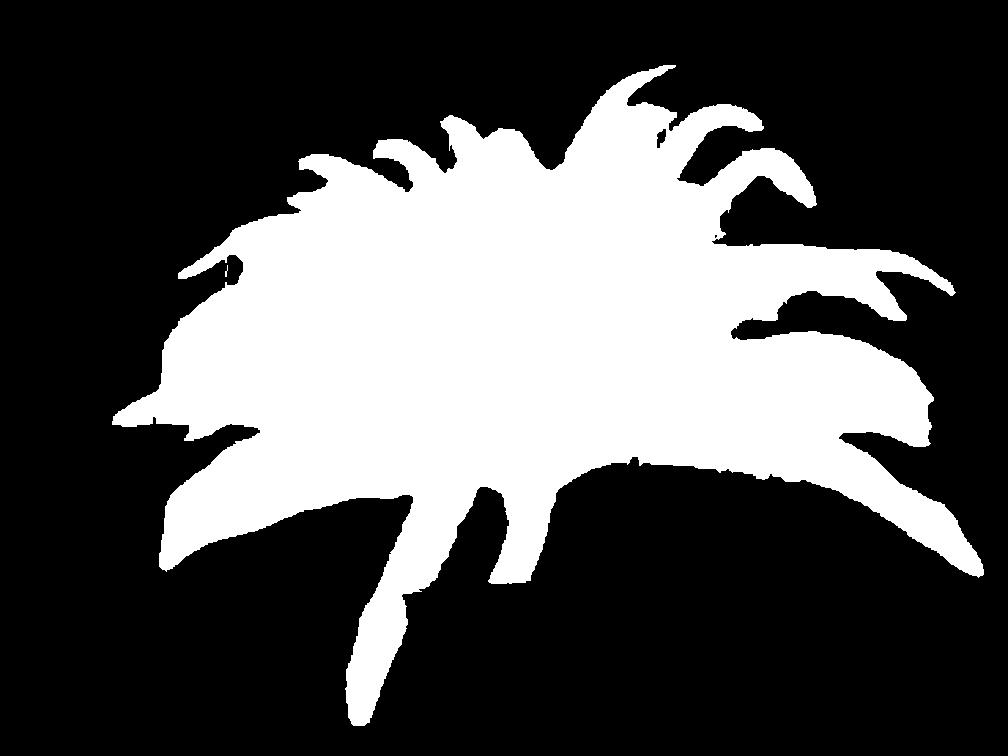

In [38]:
Image.fromarray((np.stack([mask]*3, -1) * 255).astype(np.uint8))

In [4]:
from PIL import Image
import numpy as np

img_np = np.array(Image.open('data/lerf_mask/figurines/object_mask/frame_00001.png'))
img_np.shape

(728, 986)

In [7]:
img_np.max()

91